# 🌿 6장. 다중 변수 데이터의 탐색 (Exploring Multivariate Data)

---

## 🎯 학습 목표

- 두 개 이상의 변수 간 **상관관계(Correlation)** 를 이해한다.  
- **산점도(Scatter Plot)** 와 **산점도 행렬(Scatter Matrix)** 로 관계를 시각화한다.  
- 범주형 변수에 따라 색을 달리 표현해 **그룹별 차이**를 확인한다.  
- 여러 변수 간 관계를 동시에 살펴보는 **seaborn의 pairplot** 을 활용한다.  
- 시계열/복수 변수의 **추세(Line Plot)** 를 이해한다.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ seaborn의 내장 데이터 셋 불러오기 (자동차 연비 데이터)

df = sns.load_dataset('mpg')  # 'mpg' → miles per gallon (연비)

df = df.dropna(subset=['weight', 'mpg'])  # 결측치(NaN) 제거: weight나 mpg에 값이 없는 행 삭제

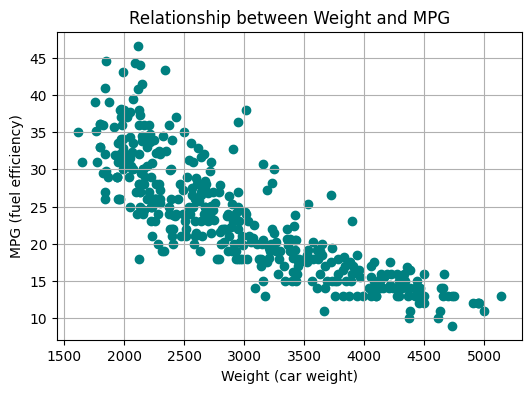

In [ ]:
# 2️⃣ 기본 산점도 (matplotlib 사용)
plt.figure(figsize=(6, 4))                # 그래프 크기 설정 (가로 6, 세로 4)

plt.scatter(                             # 산점도(scatter plot) 함수
    df['weight'],                        # x축 → 자동차 중량(weight)
    df['mpg'],                           # y축 → 연비(mpg)
    color='teal'                         # 점 색상 지정
)
plt.title('Relationship between Weight and MPG')  # 그래프 제목
plt.xlabel('Weight (car weight)')                 # x축 이름
plt.ylabel('MPG (fuel efficiency)')               # y축 이름
plt.grid(True)                                   # 배경에 격자선 표시 (데이터 해석 용이)
plt.show()                                       # 그래프 출력

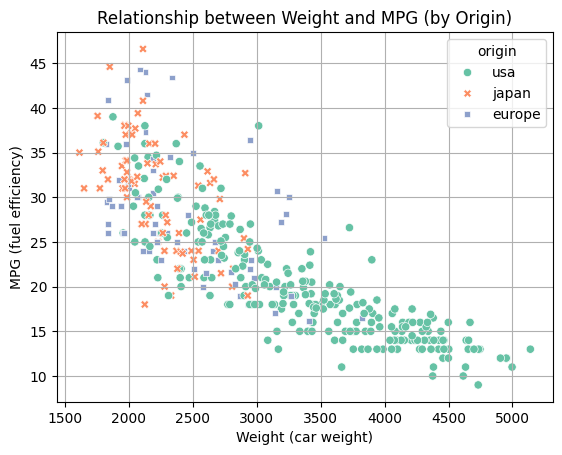

In [ ]:
# 3️⃣ seaborn의 scatterplot() 활용 (색상 구분 + 스타일)

sns.scatterplot(
    data=df,                                    # 사용할 데이터프레임
    x='weight',                                 # x축 변수
    y='mpg',                                    # y축 변수
    hue='origin',                               # 색상 기준 → origin(제조국)
    style='origin',                             # 점 모양 기준 → origin별로 구분
    palette='Set2'                              # 색상 팔레트 지정 (보기 좋은 기본 테마)
)
plt.title('Relationship between Weight and MPG (by Origin)')  # 그래프 제목
plt.xlabel('Weight (car weight)')
plt.ylabel('MPG (fuel efficiency)')
plt.grid(True)
plt.show()

## 📊 1. 산점도 (Scatter Plot)

- **두 연속형 변수** 간의 관계를 시각적으로 나타냅니다.  
- 점의 색(`hue`)이나 모양(`style`)으로 **범주형 변수**를 구분할 수 있습니다.  
- 예: 자동차 중량이 클수록 연비(`mpg`)는 감소하는 경향을 보임.

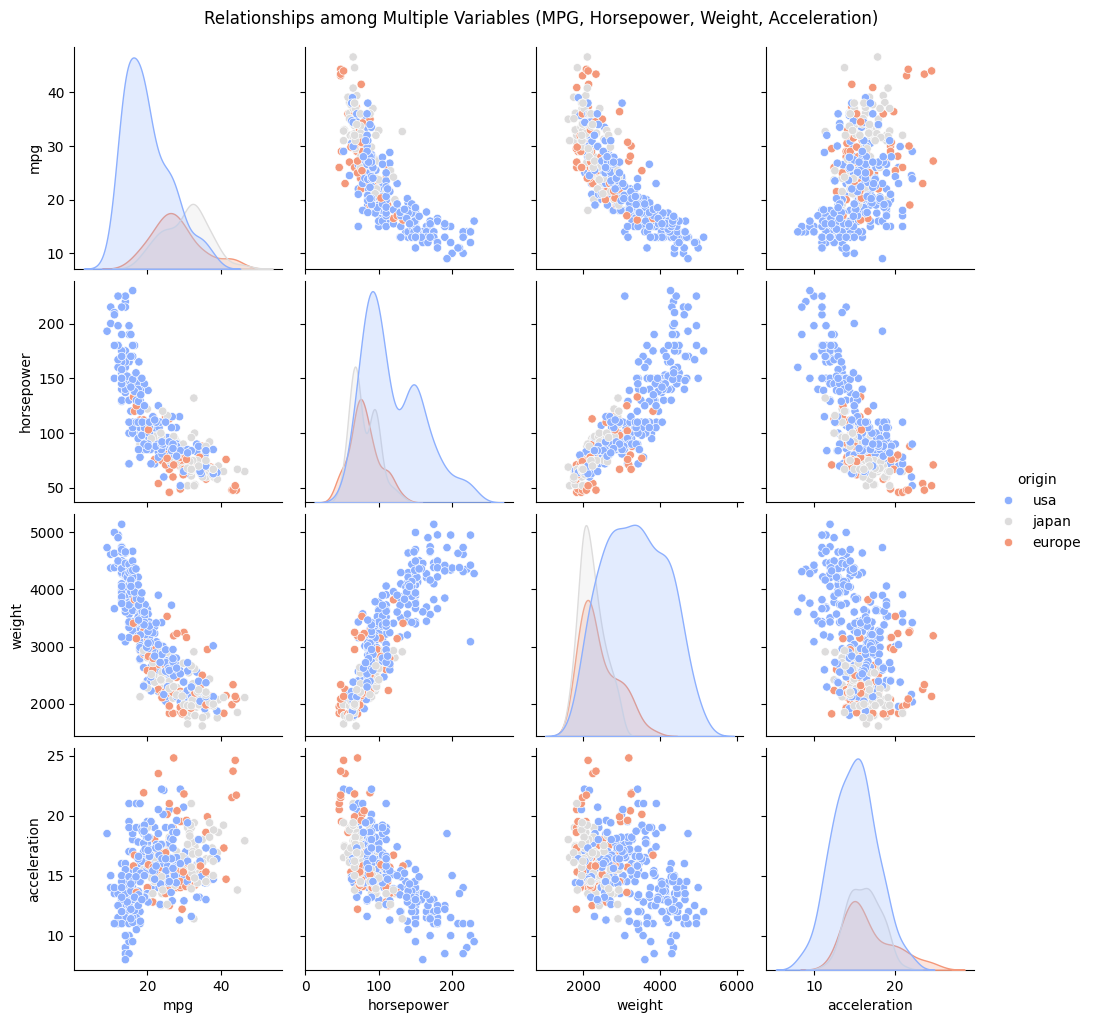

In [ ]:
# 1️⃣ 여러 변수 간의 관계를 동시에 시각화 (Pairplot)

# → 각 변수 쌍에 대해 산점도(scatter plot)를 자동으로 생성하고,

#   대각선(diagonal)에는 히스토그램(histogram) 또는 커널 밀도 그래프(kde)를 표시함
sns.pairplot(
    df[['mpg', 'horsepower', 'weight', 'acceleration', 'origin']],  # 분석할 변수 선택
    hue='origin',        # 범주형 변수(제조국)에 따라 색상 구분
    palette='coolwarm'   # 색상 팔레트 지정 (붉은색~푸른색 계열)
)

# 2️⃣ 전체 그래프 제목 설정
plt.suptitle('Relationships among Multiple Variables (MPG, Horsepower, Weight, Acceleration)',
             y=1.02)  # y=1.02 → 제목이 그래프에 겹치지 않도록 약간 위로 이동
plt.show()

## 🧩 2. 다중 산점도 행렬 (Pairplot)

- 여러 변수 간 **상호 관계**를 한눈에 확인할 수 있는 그래프입니다.  
- 대각선에는 각 변수의 **분포(히스토그램)**,  
  나머지에는 **산점도(Scatter Plot)** 가 표시됩니다.  
- 예: `mpg`(연비)와 `weight`는 음의 상관관계,  
  `horsepower`와 `weight`는 양의 상관관계를 보임.

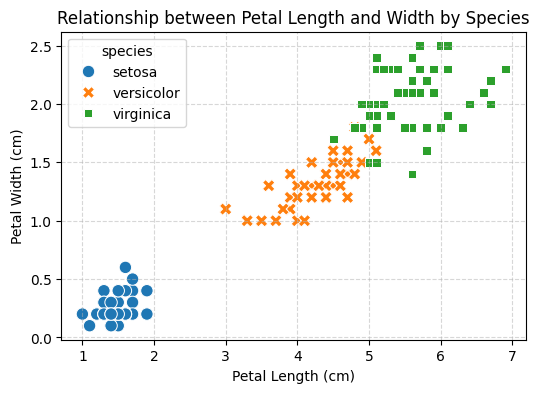

In [ ]:
# 1️⃣ Seaborn의 내장 데이터 셋 불러오기 (Iris 데이터)
iris = sns.load_dataset('iris')
# iris: 세 가지 품종(setosa, versicolor, virginica)의 꽃받침(sepal)과 꽃잎(petal) 길이·너비 데이터

# 2️⃣ 품종(species)별로 꽃잎의 길이(petal_length)와 폭(petal_width) 관계를 시각화
plt.figure(figsize=(6, 4))  # 그래프 크기 설정 (가로 6, 세로 4)

sns.scatterplot(
    data=iris,                # 사용할 데이터프레임
    x='petal_length',         # x축 변수 → 꽃잎 길이
    y='petal_width',          # y축 변수 → 꽃잎 폭
    hue='species',            # 색상 구분 기준 → 품종별 구분
    style='species',          # 점 모양(style)도 품종별로 다르게 지정
    s=80                      # 점의 크기 (기본보다 약간 크게 설정)
)

# 3️⃣ 그래프 제목 및 축 이름 설정
plt.title('Relationship between Petal Length and Width by Species')  # 제목
plt.xlabel('Petal Length (cm)')  # x축 이름
plt.ylabel('Petal Width (cm)')   # y축 이름
plt.grid(True, linestyle='--', alpha=0.5)  # 배경 격자선 추가 (가독성 향상)
plt.show()

## 🌺 3. 그룹별 산점도 (Scatter Plot by Group)

- `iris` 데이터 셋은 대표적인 다중 변수 예시입니다.  
- 품종(`species`)에 따라 **꽃잎의 길이(`petal_length`)** 와  
  **폭(`petal_width`)** 의 관계가 다르게 나타납니다.  
- 색상 구분을 통해 그룹 간 차이를 직관적으로 파악할 수 있습니다.

In [ ]:
# 1️⃣ Iris 데이터 셋의 상관계수(correlation coefficient) 계산
# → 상관계수: 두 변수 간의 관계 강도와 방향을 나타내는 값 (-1 ~ +1)

iris_corr = iris.corr(numeric_only=True)  # 수치형 컬럼만 선택해서 상관관계 계산

print(iris_corr)  # 계산된 상관계수 행렬 출력

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


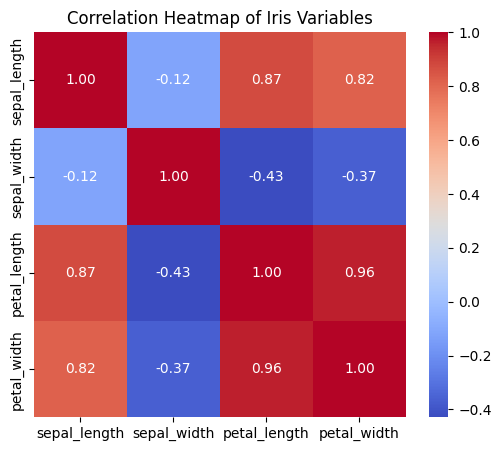

In [ ]:
# 2️⃣ Heatmap으로 시각화
plt.figure(figsize=(6, 5))  # 그래프 크기 설정

sns.heatmap(
    iris_corr,               # 상관계수 행렬
    annot=True,              # 셀 안에 값 표시
    cmap='coolwarm',         # 색상 팔레트 (붉은색=양의 상관, 푸른색=음의 상관)
    fmt=".2f"                # 소수점 둘째 자리까지 표시
)

# 3️⃣ 제목 설정
plt.title('Correlation Heatmap of Iris Variables')  # 그래프 제목
plt.show()

## 🔗 4. 상관계수 (Correlation)

- 변수 간의 **선형 관계 정도**를 수치로 표현합니다.  
- `+1`: 강한 양의 상관관계 (함께 증가)  
- `0`: 관계 없음  
- `-1`: 강한 음의 상관관계 (한쪽이 증가하면 다른 쪽 감소)  
- 예: 꽃잎 길이(`petal_length`)와 폭(`petal_width`)의 상관계수 ≈ 0.96 → 매우 강한 양의 상관.

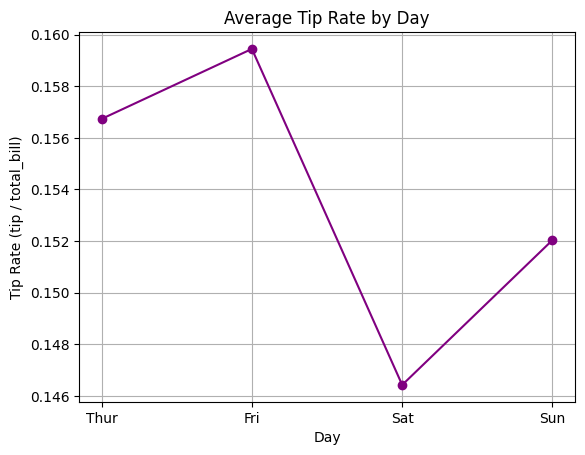

In [ ]:
# 1️⃣ seaborn의 내장 데이터 셋 'tips' 불러오기
tips = sns.load_dataset('tips')  # 식당에서 팁을 준 데이터 (요일, 성별, 금액 등 포함)
tips = sns.load_dataset('tips')

# 2️⃣ 요일별 평균 팁 비율 계산
#    → 팁 비율 = (평균 팁 금액 / 평균 총 지불 금액)
tip_rate = tips.groupby('day', observed=True)['tip'].mean() / \
           tips.groupby('day', observed=True)['total_bill'].mean()

# 3️⃣ 선그래프로 요일별 팁 비율 시각화
plt.plot(
    tip_rate.index,         # x축: 요일 (Thu, Fri, Sat, Sun)
    tip_rate.values,        # y축: 팁 비율
    marker='o',             # 데이터 포인트 표시 (원형 마커)
    linestyle='-',          # 선 스타일 (실선)
    color='purple'          # 선 색상
)

# 4️⃣ 그래프 제목과 축 레이블 설정
plt.title('Average Tip Rate by Day')     # 그래프 제목
plt.xlabel('Day')                        # x축 레이블
plt.ylabel('Tip Rate (tip / total_bill)') # y축 레이블

# 5️⃣ 격자 추가 (가독성 향상)
plt.grid(True)

# 6️⃣ 그래프 출력
plt.show()

## 📈 5. 선그래프 (Line Plot)

- 시계열 데이터나 변화 추세를 표현할 때 사용합니다.  
- `tips` 데이터에서 요일별 평균 팁 비율(`tip_rate`)의 변화 추세를 확인합니다.  
- 예: 주중(목·금)에는 평균 팁 비율이 다소 높게 나타남.

## 📊 데이터 개요

- **mpg** 데이터 셋은 자동차의 연비, 배기량, 중량, 마력 등의 정보를 담고 있음.  
- 주요 변수:
  - **mpg**: 연비 (연속형)
  - **horsepower**: 마력
  - **weight**: 차량 중량
  - **acceleration**: 가속도
  - **origin**: 제조 지역 (categorical)

이번 실습에서는  
① 변수 간의 관계를 산점도로 시각화하고  
② 상관관계를 계산하며  
③ 제조 지역별 평균 비교를 수행합니다.

In [ ]:
import seaborn as sns
import pandas as pd

# 내장 데이터 셋: 미국 주별 사회경제 정보 대체용
# seaborn에는 state_x77와 유사한 'mpg' 데이터 셋 사용
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## 📈 산점도(Scatter Plot) 해석

- **배기량이 클수록 연비는 낮음(음의 상관관계)**  
- 상관계수 −1에 가까울수록 **선형 관계가 강함**  
  → `-0.8 이상`이면 강한 음의 상관관계로 해석 가능

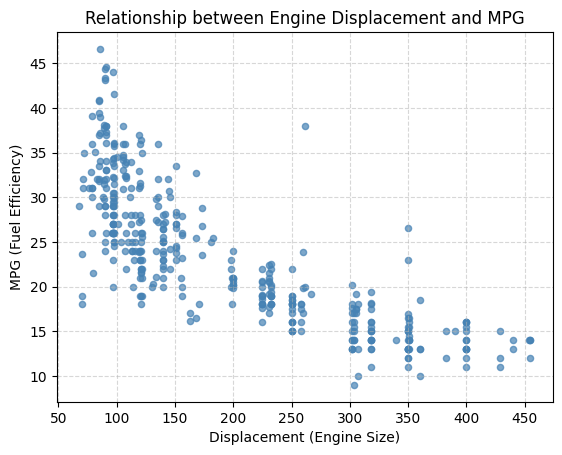

In [ ]:
# 배기량(displacement)과 연비(mpg)의 관계 시각화 및 상관분석
# 🚗 데이터는 이전에 sns.load_dataset('mpg') 로 불러온 df 사용

# 1️⃣ 산점도 (Scatter Plot)
df.plot.scatter(
    x='displacement',        # x축: 엔진 배기량
    y='mpg',                 # y축: 연비
    color='steelblue',       # 점 색상
    alpha=0.7                # 점의 투명도 (1.0은 불투명, 0은 완전 투명)
)
plt.title('Relationship between Engine Displacement and MPG')
plt.xlabel('Displacement (Engine Size)')
plt.ylabel('MPG (Fuel Efficiency)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
# 2️⃣ 상관계수 계산 (Correlation Coefficient)
# corr() 함수는 두 변수 간의 상관관계를 계산
# 결과값: -1 ~ +1 사이 (음수 = 반비례, 양수 = 비례, 0 = 관계 없음)
corr_value = df['displacement'].corr(df['mpg'])

# 소수점 3자리로 표시
print(f"Correlation between displacement and mpg: {corr_value:.3f}")

Correlation between displacement and mpg: -0.804


## 🔍 산점도 행렬(Scatter Matrix)

- 여러 변수 간 관계를 한눈에 파악할 수 있음  
- 대각선(diagonal)은 히스토그램 → 각 변수의 분포  
- 나머지 칸은 변수 간 산점도 → 관계 확인  
  - 예: **무게(weight)가 증가하면 연비(mpg)는 감소**

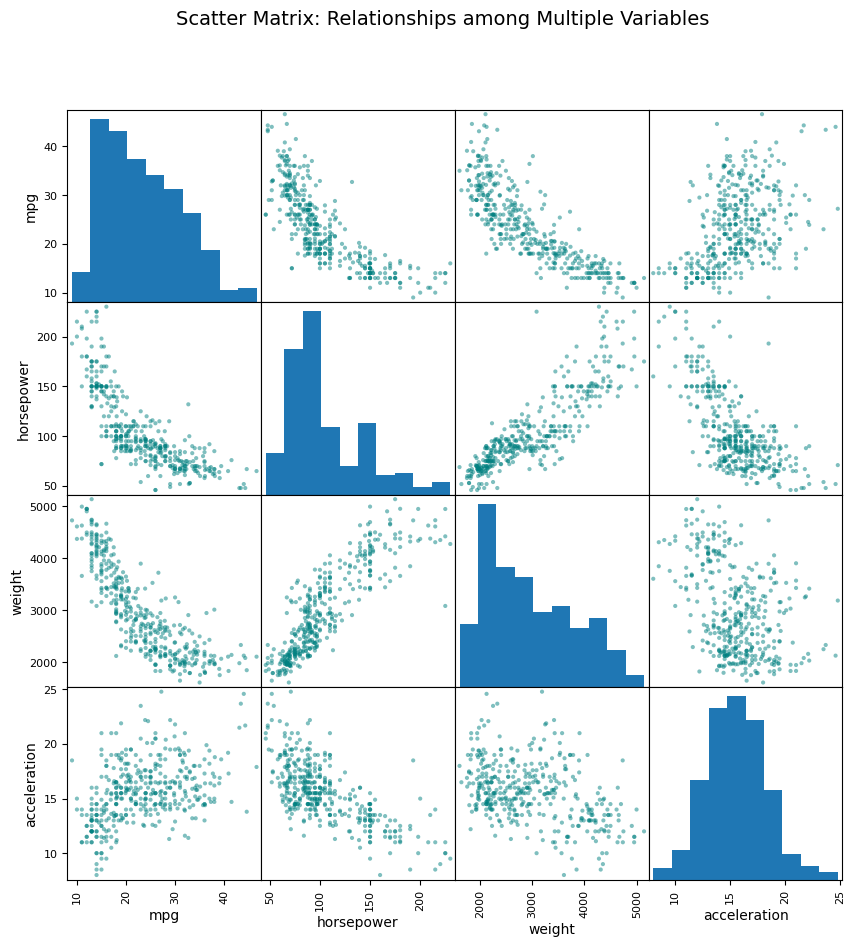

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ✅ 다중 변수의 관계를 한눈에 보기 위한 "산점도 행렬(Scatter Matrix)"
# 여러 변수 간 상관관계와 분포를 동시에 시각화할 수 있음

pd.plotting.scatter_matrix(
    df[['mpg', 'horsepower', 'weight', 'acceleration']],  # 분석할 변수 4개 선택
    figsize=(10, 10),       # 그래프 크기 설정 (inch 단위)
    diagonal='hist',        # 대각선 방향에는 히스토그램(histogram) 표시
    color='teal'            # 산점도 점 색상 지정
)

# 전체 제목 설정
plt.suptitle('Scatter Matrix: Relationships among Multiple Variables', fontsize=14)
plt.show()

## 📐 상관계수 행렬(Correlation Matrix)

| 값 범위 | 해석 |
|----------|------|
| **+1** | 완벽한 양의 상관 (같이 증가) |
| **0** | 상관 없음 |
| **−1** | 완벽한 음의 상관 (하나 증가 → 다른 감소) |

- `weight` ↔ `mpg` : 강한 음의 상관  
- `horsepower` ↔ `mpg` : 음의 상관  
- `acceleration` ↔ `mpg` : 약한 양의 상관

In [ ]:
# ✅ 상관계수 행렬(correlation matrix) 계산
# 각 변수 간의 선형 관계(상관성)를 수치로 표현 (값의 범위: -1 ~ +1)

corr_matrix = df[['mpg', 'horsepower', 'weight', 'acceleration']].corr()  # 선택한 변수 간 상관계수 계산

print("변수 간 상관계수 행렬:")
print(corr_matrix)

변수 간 상관계수 행렬:
                   mpg  horsepower    weight  acceleration
mpg           1.000000   -0.778427 -0.831741      0.420289
horsepower   -0.778427    1.000000  0.864538     -0.689196
weight       -0.831741    0.864538  1.000000     -0.417457
acceleration  0.420289   -0.689196 -0.417457      1.000000


## 🌎 그룹별 비교 분석

- `groupby()`를 통해 지역별(Origin) 평균 연비 비교  
- **결과:**  
  - `Japan` 자동차 → 평균 연비 가장 높음  
  - `USA` 자동차 → 가장 낮음  
- 지역별로 제조 특성 차이를 반영한 결과  
  (엔진 효율, 차량 크기 등)

In [ ]:
# ✅ 1️⃣ 제조 지역(origin)별 평균 연비 계산

# groupby('origin'): origin(제조 지역)별로 데이터를 그룹화

# ['mpg'].mean(): 각 그룹 내 mpg(연비)의 평균을 계산

# sort_values(ascending=False): 평균 연비를 내림차순으로 정렬

region_mean = df.groupby('origin')['mpg'].mean().sort_values(ascending=False)
print("지역별 평균 연비:\n", region_mean, "\n")

지역별 평균 연비:
 origin
japan     30.450633
europe    27.891429
usa       20.083534
Name: mpg, dtype: float64 



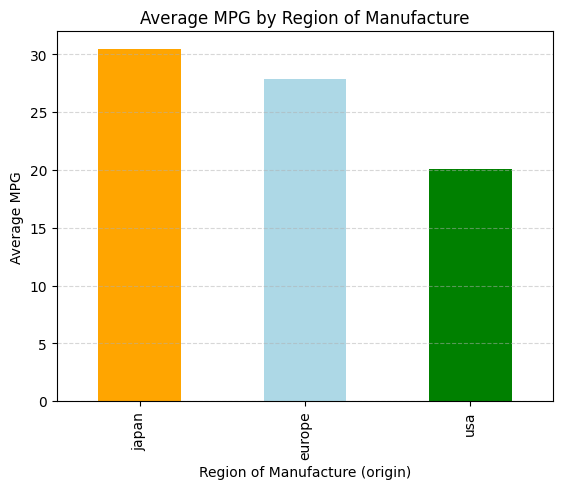

In [ ]:
# ✅ 2️⃣ 시각화 - 막대그래프(bar chart)

region_mean.plot.bar(
    color=['orange', 'lightblue', 'green']  # 지역별로 구분된 색상 지정
)
plt.title('Average MPG by Region of Manufacture')  # 그래프 제목
plt.xlabel('Region of Manufacture (origin)')        # x축 레이블
plt.ylabel('Average MPG')                           # y축 레이블
plt.grid(True, axis='y', linestyle='--', alpha=0.5) # y축 방향 점선 격자 추가
plt.show()

## 🎨 색상으로 그룹을 구분한 산점도

- **색상(color)** 을 활용하면 변수 간 관계뿐 아니라 **그룹별 분포 차이**도 한눈에 확인 가능  
- 예: 일본(Japan)은 낮은 마력에서도 높은 연비 → 효율 중심  
- 미국(USA)은 마력이 높지만 연비가 낮음 → 대형차 중심

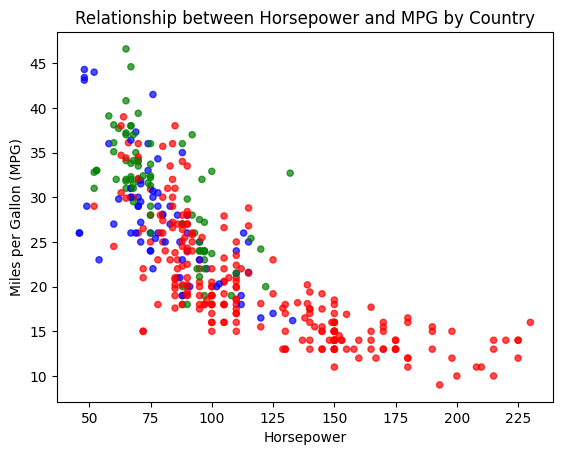

In [ ]:
# ✅ 1️⃣ 국가별 색상 구분을 위한 매핑 정의
# 딕셔너리 형태로 origin 값에 따라 색상 지정

color_map = {'usa': 'red', 'japan': 'green', 'europe': 'blue'}

# df['origin'].map(color_map)
# → origin 컬럼의 값('usa', 'japan', 'europe')을 color_map을 기준으로 색상으로 변환
colors = df['origin'].map(color_map)

# ✅ 2️⃣ 산점도(scatter plot) 작성
# x='horsepower': x축은 마력(horsepower)

# y='mpg': y축은 연비(mpg)

# c=colors: 국가별 색상 지정 (미국=빨강, 일본=초록, 유럽=파랑)
# alpha=0.7: 투명도 설정 (0~1 사이 값, 겹치는 점을 잘 보이게)
df.plot.scatter(x='horsepower', y='mpg', c=colors, alpha=0.7)

# ✅ 3️⃣ 그래프 제목과 축 레이블 설정
plt.title('Relationship between Horsepower and MPG by Country')  # 그래프 제목
plt.xlabel('Horsepower')  # x축 레이블
plt.ylabel('Miles per Gallon (MPG)')  # y축 레이블

# ✅ 4️⃣ 그래프 표시
plt.show()

# ✅ 다중 변수 데이터 탐색 요약

| 분석 기법 | 목적 | 대표 코드 | 그래프 |
|------------|-------|------------|---------|
| **산점도(Scatter)** | 두 변수 간 관계 | `plot.scatter()` | 산점도 |
| **상관계수(Correlation)** | 관계 강도 수치화 | `df.corr()` | 없음 |
| **산점도 행렬(Scatter Matrix)** | 여러 변수 동시 비교 | `pd.plotting.scatter_matrix()` | 다중 산점도 |
| **그룹 분석(Groupby)** | 범주형 그룹 간 차이 비교 | `df.groupby()` | 막대그래프 |
| **색상 시각화(Color Group)** | 그룹 간 분포 차이 | `c=colors` | 산점도 |

---

💡 결론  
다중 변수 탐색은 “변수 간 관계”를 파악하고,  
이후 “상관분석 → 회귀분석 → 예측모델링”으로 발전하는 기초 단계입니다.

# ✅ 정리: 다중 변수 탐색의 핵심

- **산점도** : 두 변수의 관계를 시각적으로 파악  
- **pairplot / scatter_matrix** : 여러 변수 간의 상관관계 시각화  
- **heatmap** : 상관계수의 강약을 색상으로 표현  
- **그룹별 시각화** : 범주형 변수에 따라 데이터 패턴 비교  
- **선그래프(Line Plot)** : 시간·순서에 따른 변화 추세 파악  

💬 데이터사이언스에서는 “변수 간의 관계를 보는 눈”이  
AI 모델링의 기초 통찰력(insight)으로 연결됩니다.